<a href="https://colab.research.google.com/github/datawilly/EDA-geoespacial/blob/main/Analisis_Geoespacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis Geoespacial

##Preprocesamiento
Iniciamos cargando nuestras librerias y nuestro dataframe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Geospacial/Copia de zomato.csv')

In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Vamos a conocer nuestros datos

In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
df.shape

(51717, 17)

Revisamos los datos que se encuentran vacios, para esto vamos a sumar los campos vacios dentro de nuestro dataframe

In [ ]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

Entonces: para cada feature en las columnas de nuestro dataframe, si la suma de los elementos vacios es mayor a cero, vamos a incluirlo en una lista llamada feature_na

In [ ]:
feature_na = [feature for feature in df.columns if df[feature].isnull().sum() > 0]

In [ ]:
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

Para sacar el procentaje de valores faltantes solo vamos a usar print con format donde el primer placeholder es tomado de la lista que creamos y para el segundo vamos a realizar la division de la suma de los valores nulos entre el total de valores de nuestro dataframe por feature y lo multiplicamos por 100

In [ ]:
for feature in feature_na:
  print('{} tiene {} de valores faltantes'.format(feature,round((df[feature].isnull().sum()/len(df)*100),2)))

rate tiene 15.03 de valores faltantes
phone tiene 2.34 de valores faltantes
location tiene 0.04 de valores faltantes
rest_type tiene 0.44 de valores faltantes
dish_liked tiene 54.29 de valores faltantes
cuisines tiene 0.09 de valores faltantes
approx_cost(for two people) tiene 0.67 de valores faltantes


Vamos a analizar una de las features que tienen valores faltantes, en este caso rate y queremos ver cuales son los valores unicos de esta feature

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Primero vamos a eliminar los valores que se encuentran vacios, usamos index para que elimine la fila completa de los valores que se encuentran vacios

In [ ]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [ ]:
df.shape

(43942, 17)

Tenemos el problema del formato del resto de nuestros valores pues tienen un /, entonces vamos a limpiar esto creando una funcion que nos permita separar los valores de acuerdo al / y usamos el 0 para indicarle que el indice que queremos que tome en cuenta corresponda al primer elemento

In [ ]:
def split(x):
  return x.split('/')[0]

In [ ]:
df['rate'] = df['rate'].apply(split)

In [ ]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

Ahora que tenemos nuestros datos mas limpios, vamos a reemplazar NEW y - por cero con replace

In [ ]:
df.replace('NEW',0,inplace=True)

In [ ]:
df.replace('-',0,inplace=True)

Vamos a cambiar el tipo del elemento por float para poder hacer operaciones, ya que actualmente es tipo object

In [ ]:
df['rate'] = df['rate'].astype('float')

In [ ]:
df['rate'].mean()

3.5086978289563504

In [ ]:
df['rate'].head(100)

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
99     3.8
100    3.5
101    3.7
102    3.5
103    3.8
Name: rate, Length: 100, dtype: float64

In [ ]:
df['rate'].replace(0,round(df['rate'].mean(),2),inplace=True)

Ahora vamos a averiguar la calificacion promedio de cada restaurante, para esto primero tenemos que agruparlos por cada uno, usando groupby, entonces los agrupamos de acuerdo al nombre, y usamos nuestro feature rate tomando su promedio, para que nos genere un dataframe nuevo y no solo un grupo de datos usamos to_frame y le pedimos que nos genere un index por defecto

In [ ]:
df_rate = df.groupby('name')['rate'].mean().to_frame().reset_index()

In [ ]:
df_rate.columns=['restaurant','avg_rating']
df_rate.head()

,restaurant,avg_rating
0,#FeelTheROLL,3.4
1,#L-81 Cafe,3.9
2,#refuel,3.7
3,1000 B.C,3.2
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.7


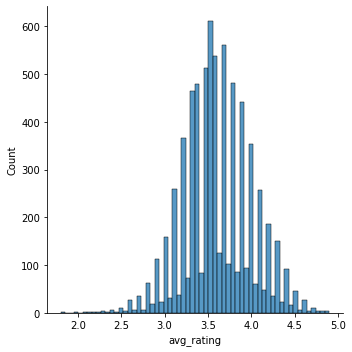

In [ ]:
sns.displot(df_rate['avg_rating'])

Text(0.5, 0, 'Numero de pedidos')

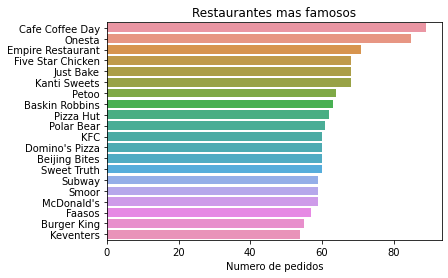

In [ ]:
chains = df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index)
plt.title('Restaurantes mas famosos')
plt.xlabel('Numero de pedidos')

Por ultimo vamos a revisar cuantos restaurantes aceptan ordenes por internet

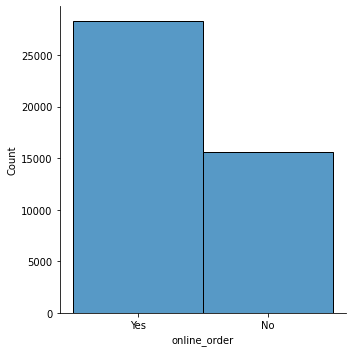

In [ ]:
sns.displot(df['online_order'])

Una forma mas interactiva de realizar esto es a travez de plotly

In [ ]:
import plotly.express as px

In [ ]:
px.pie(df,values=df['online_order'].value_counts(),names=['acepta','no acepta'])